# MATPLOTLIB VISUALIZATIONS OF CHURN DATA

Data source: https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/refs/heads/master/Churn_Modelling.csv

## Data Importation

In [3]:
import pandas as pd

# Source Link
url = "https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/refs/heads/master/Churn_Modelling.csv"
df = pd.read_csv(url)

# Data Overview
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# Checking columns
print(df.columns.tolist())

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


## Visualization

### Grouped Bar Chart of Country and Gender

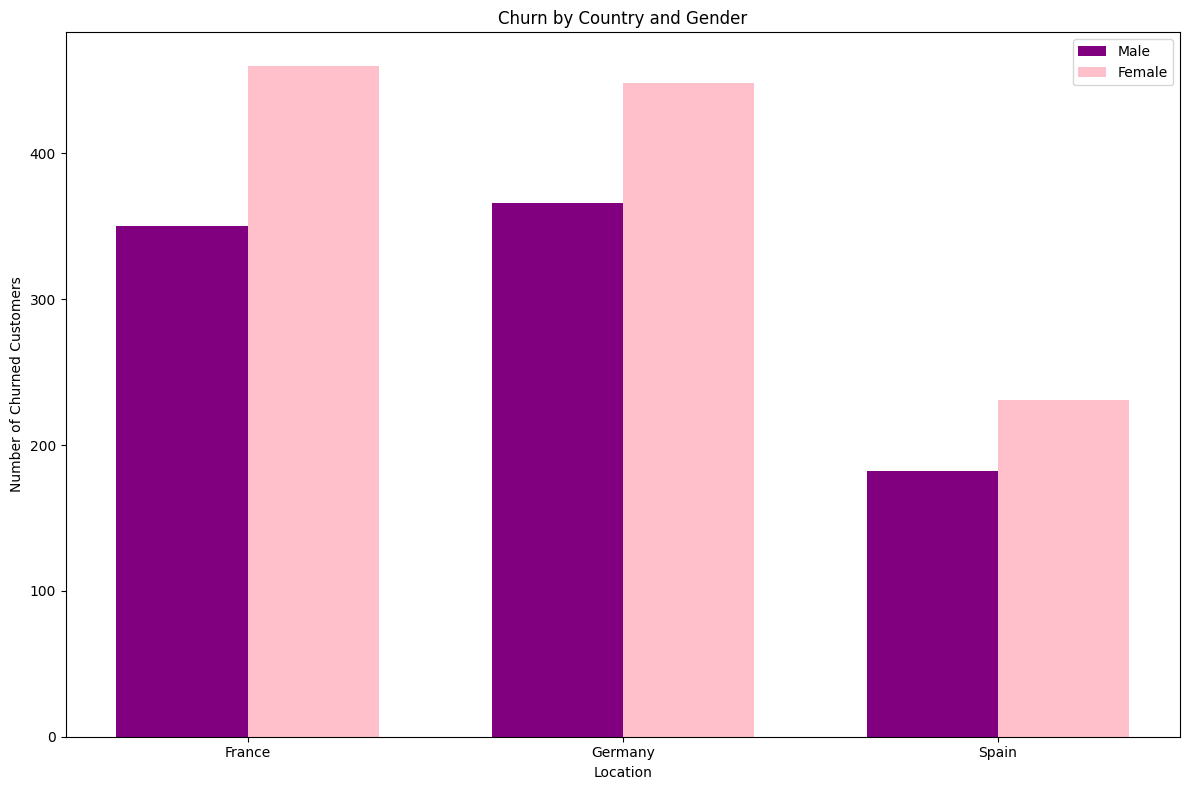

In [14]:
import matplotlib.pyplot as plt

# Data preparation for grouping
groups_GG = df[df['Exited'] == 1].groupby(['Geography', 'Gender']).size().unstack()
r = range(len(groups_GG ))
w = 0.35

# Plot
plt.figure(figsize=(12, 8))
plt.bar([i - w/2 for i in r], groups_GG ['Male'], width=w, label='Male', color='purple')
plt.bar([i + w/2 for i in r], groups_GG ['Female'], width=w, label='Female', color='pink')
plt.xticks(r, groups_GG .index)
plt.xlabel('Location')
plt.ylabel('Number of Churned Customers')
plt.title('Churn by Country and Gender')
plt.legend()
plt.tight_layout()
plt.show()


### Scatterplot for Age vs Salary

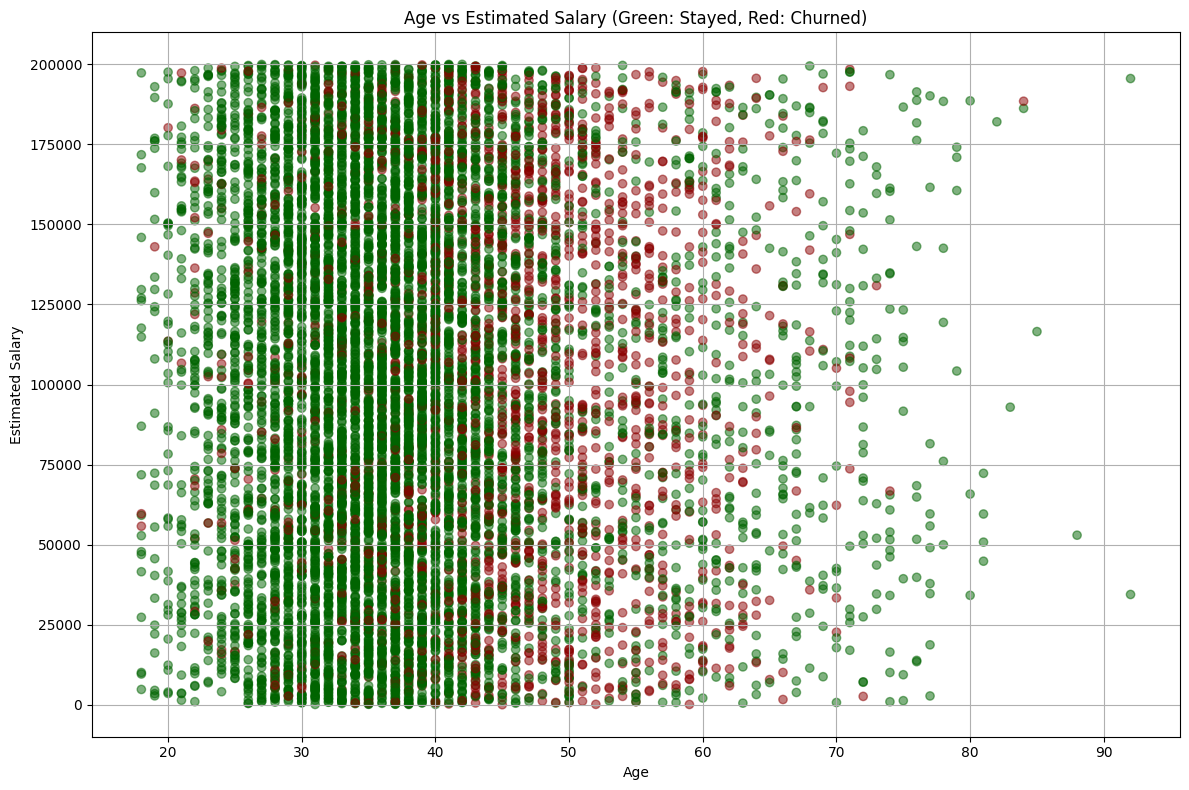

In [12]:
# Setting colors
colors = df['Exited'].map({0: 'darkgreen', 1: 'darkred'})

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(df['Age'], df['EstimatedSalary'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (Green: Stayed, Red: Churned)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Binned Bar Chart for Churn and Ranges of Credit Score

/tmp/ipython-input-3741773836.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('CreditScoreBin')['Exited'].mean()


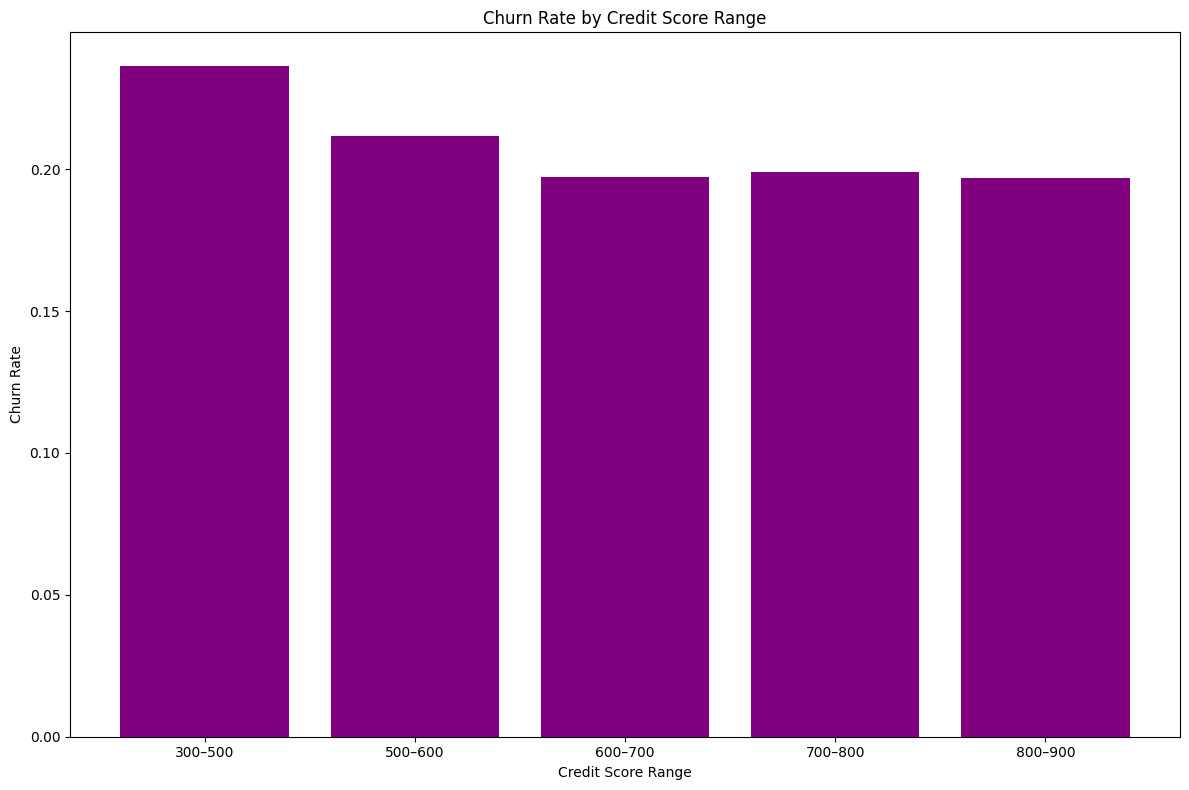

In [13]:
# Data Preparation for Bins
bins = [300, 500, 600, 700, 800, 900]
labels = ['300–500', '500–600', '600–700', '700–800', '800–900']
df['CreditScoreBin'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)
churn_rate = df.groupby('CreditScoreBin')['Exited'].mean()

# Plot
plt.figure(figsize=(12, 8))
plt.bar(churn_rate.index.astype(str), churn_rate.values, color='purple')
plt.xlabel('Credit Score Range')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Score Range')
plt.tight_layout()
plt.show()
